# Local Search Implementation on Diagonal Magic Cube
## Made by:
- Jeremy Deandito / 18222112 

- Nathaniel Liady / 18222114

- Gabriel Marcellino / 18222115

- Nicolas Jeremy / 18222135

## Import relevant libraries

In [1]:
from tensor import *

from simulated import *

from hill_climb import *


import numpy as np

## Cube Initialization

### Goal State
 Final state cube we are trying to achieve.<br><br> 
 The ideal state

In [2]:
goal_state = [

# Level 1
[
    [33, 22, 113, 42, 105],
    [2, 89, 106, 19, 99],
    [85, 82, 4, 119, 25],
    [98, 90, 6, 112, 9],
    [97, 32, 86, 23, 77]
],
# Level 2
[
    [95, 80, 111, 11, 18],
    [91, 55, 65, 69, 35],
    [16, 66, 70, 53, 110],
    [5, 68, 54, 67, 121],
    [108, 46, 15, 115, 31]
],
# Level 3
[
    [100, 17, 48, 34, 116],
    [114, 75, 52, 62, 12],
    [83, 50, 63, 76, 43],
    [8, 64, 74, 51, 118],
    [10, 109, 78, 92, 26]
],
# Level 4
[
    [38, 102, 3, 125, 47],
    [81, 59, 72, 58, 45],
    [30, 73, 56, 60, 96],
    [87, 57, 61, 71, 39],
    [79, 24, 123, 1, 88]
],
# Level 5
[
    [49, 94, 40, 103, 29],
    [27, 37, 20, 107, 124],
    [101, 44, 122, 7, 41],
    [117, 36, 120, 14, 28],
    [21, 104, 13, 84, 93]
]
]

In [3]:
goal_cube = Tensor(5,5,5,initial_array=goal_state)

In [4]:
goal_cube.objective_function()

1278394.0

### Problem Cube Initialization

In [5]:
problem_cube = Tensor(5,5,5)

cube = problem_cube.initial_state()

In [6]:
# cube.plot_cube()

In [7]:
# cube.print_tensor()

In [8]:
# cube.plot_per_level()

In [9]:
obj_func = cube.objective_function()
print(f"cube's objective function: {obj_func}")

cube's objective function: 1786302.0


## Local Seach Implementation

### Steepest Ascent Hill-Climbing

In [10]:
# print(f"ideal objective function {goal_cube.objective_function()}")

In [11]:
# HC = Hill_climb(cube=cube)

In [12]:
# HC.results()

In [13]:
# goal_cube.objective_function()

In [14]:
# print(f"differences from ideal: {HC.best_value - goal_cube.objective_function()}")

In [15]:
# HC.hist_plot()

### Simulated Annealing

In [16]:
print(f"ideal objective function {goal_cube.objective_function()}")

ideal objective function 1278394.0


In [17]:
SA = Simulated(cube=cube,tmax=10000,step_max=1000,cooling_schedule="linear",alpha=0.999)

Initial Energy: 1786302.0

Step:1, Energy: 1788430.0, Best Energy: 1786302.0,Temperature: 10000

Step:2, Energy: 1765006.0, Best Energy: 1786302.0,Temperature: 9999.001

Step:3, Energy: 1753598.0, Best Energy: 1765006.0,Temperature: 9998.002

Step:4, Energy: 1761236.0, Best Energy: 1753598.0,Temperature: 9997.003

Step:5, Energy: 1788308.0, Best Energy: 1753598.0,Temperature: 9996.004

Step:6, Energy: 1804116.0, Best Energy: 1753598.0,Temperature: 9995.005

Step:7, Energy: 1804844.0, Best Energy: 1753598.0,Temperature: 9994.006

Step:8, Energy: 1803884.0, Best Energy: 1753598.0,Temperature: 9993.007

Step:9, Energy: 1808984.0, Best Energy: 1753598.0,Temperature: 9992.008

Step:10, Energy: 1860392.0, Best Energy: 1753598.0,Temperature: 9991.009

Step:11, Energy: 1871408.0, Best Energy: 1753598.0,Temperature: 9990.01

Step:12, Energy: 1884928.0, Best Energy: 1753598.0,Temperature: 9989.011

Step:13, Energy: 1885072.0, Best Energy: 1753598.0,Temperature: 9988.012

Step:14, Energy: 1817182

In [18]:
SA.results()

+------------------------ RESULTS -------------------------+

cooling sched.: linear multiplicative
  initial temp: 10000
    final temp: -0.989000
     max steps: 1000
    final step: 10012

  final energy: 1420798.000000

+-------------------------- END ---------------------------+


In [19]:
goal_cube.objective_function()

1278394.0

In [20]:
print(f"differences from ideal: {SA.best_energy - goal_cube.objective_function()}")

differences from ideal: 142404.0


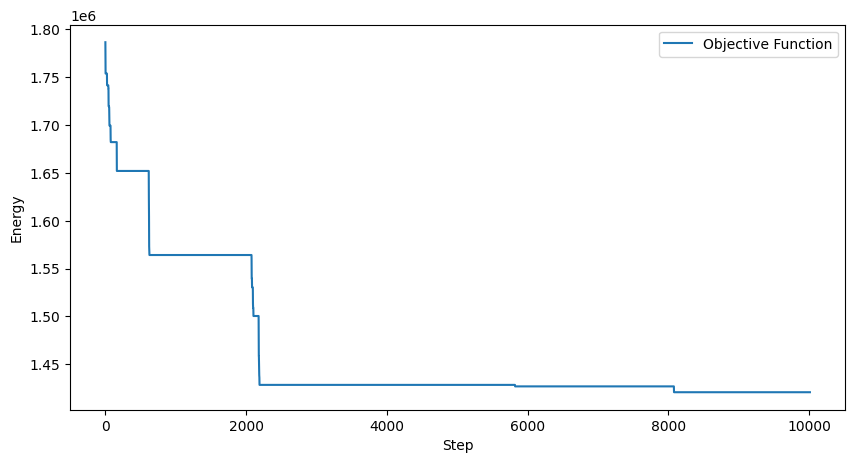

In [21]:
SA.hist_plot()

### Genetic Algorithm
